# Examples of the slides of kNN

First we load some favourites

In [1]:
import numpy as np # vectors etc
from sklearn.datasets import make_classification, make_moons, make_blobs  # Toy data
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt # for plotting

Downloading or generating data to play with is easy using sklearn.

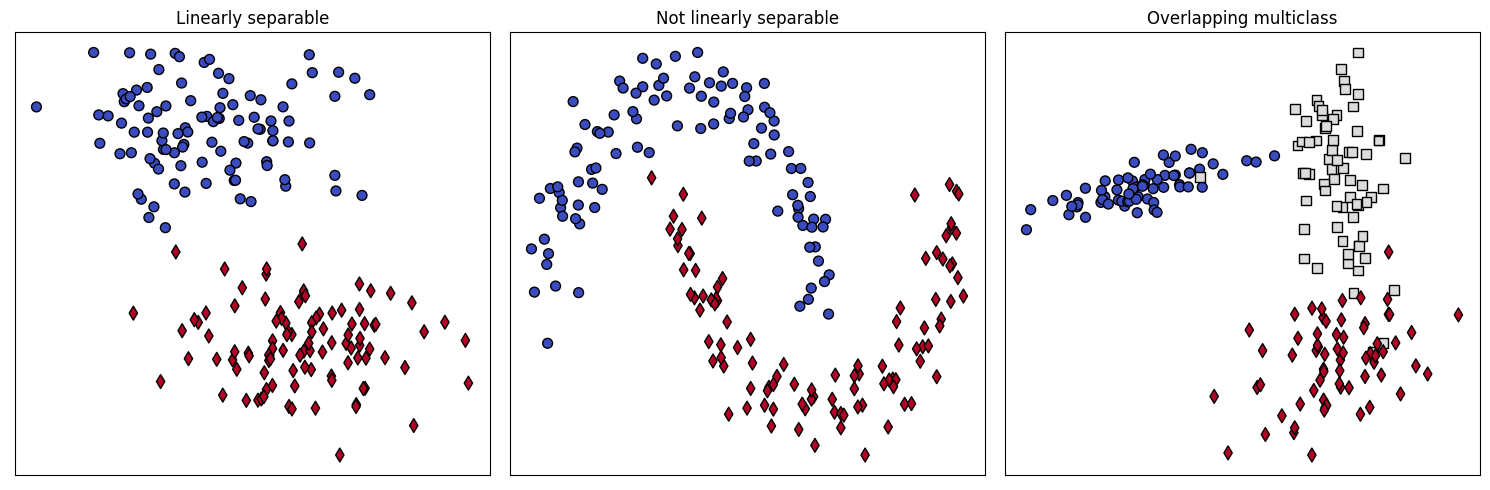

In [2]:
def plot_classification(classifier=None):
  data = [make_blobs(n_samples=200, centers=2, cluster_std=.7, n_features=2, random_state=0),
          make_moons(n_samples=200, noise=.1, random_state=0),
          make_classification(n_samples=200, n_features=2, n_informative=2, 
                              n_redundant=0, n_repeated=0, n_classes=3, class_sep=1.8,
                              n_clusters_per_class=1, random_state=0)]

  fig = plt.figure(figsize=(15, 5), dpi=100)
  ax = fig.subplots(1, 3)
  titles = ['Linearly separable', 'Not linearly separable', 'Overlapping multiclass']
  for i, (X, y) in enumerate(data):
    if len(np.unique(y)) == 2:
      markers = ['o', 'd']
    else:
      markers = ['o', 's', 'd']
    for j, label in enumerate(np.unique(y)):
      ax[i].scatter(X[y==label, 0], X[y==label, 1], c=y[y==label], s=50, marker=markers[j], edgecolor='k', cmap='coolwarm', vmin=y.min(), vmax=y.max())
    ax[i].set_title(titles[i])
    if classifier is not None:
      classifier.fit(X, y)
      a = ax[i].axis()
      XX, YY = np.meshgrid(np.linspace(a[0], a[1], 200),
                          np.linspace(a[2], a[3], 200))
      Z = classifier.predict(np.concatenate([np.vstack(XX.ravel()), 
                                            np.vstack(YY.ravel())], axis=1))
      # ax[i].contourf(XX, YY, Z.reshape(XX.shape), alpha=.5, cmap='coolwarm', zorder=-1)#, levels=np.arange(y.min()+0.5, y.max()))
      ax[i].pcolor(XX, YY, Z.reshape(XX.shape), alpha=.5, cmap='coolwarm', edgecolors='none', snap=True, zorder=-1)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
  fig.tight_layout()
  fig.show()

plot_classification()

Making a classifier with sklearn (almost) always entails:

1.   Import classifier
2.   Instantiate with default or chosen hyperparameters
3.   Run the fit() method with the training data

Note that there is no training/test split here for now.

In [3]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

This gives us a split of the space for the different classes.

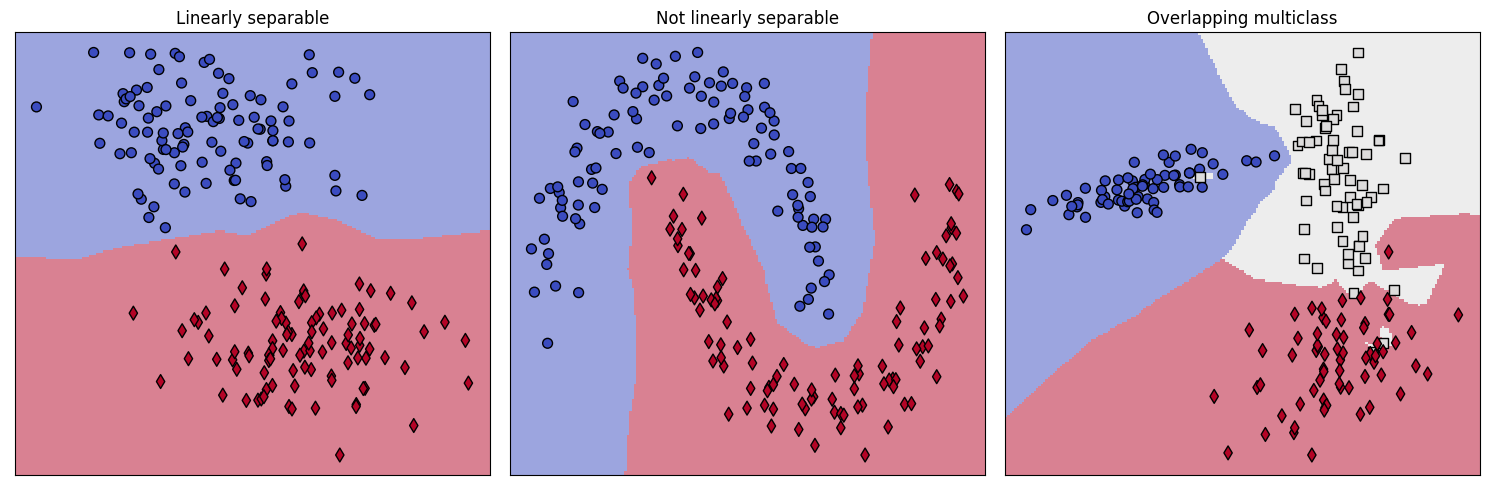

In [4]:
plot_classification(classifier)

How about using more neighbours. This should "regularize" the regions somewhat.

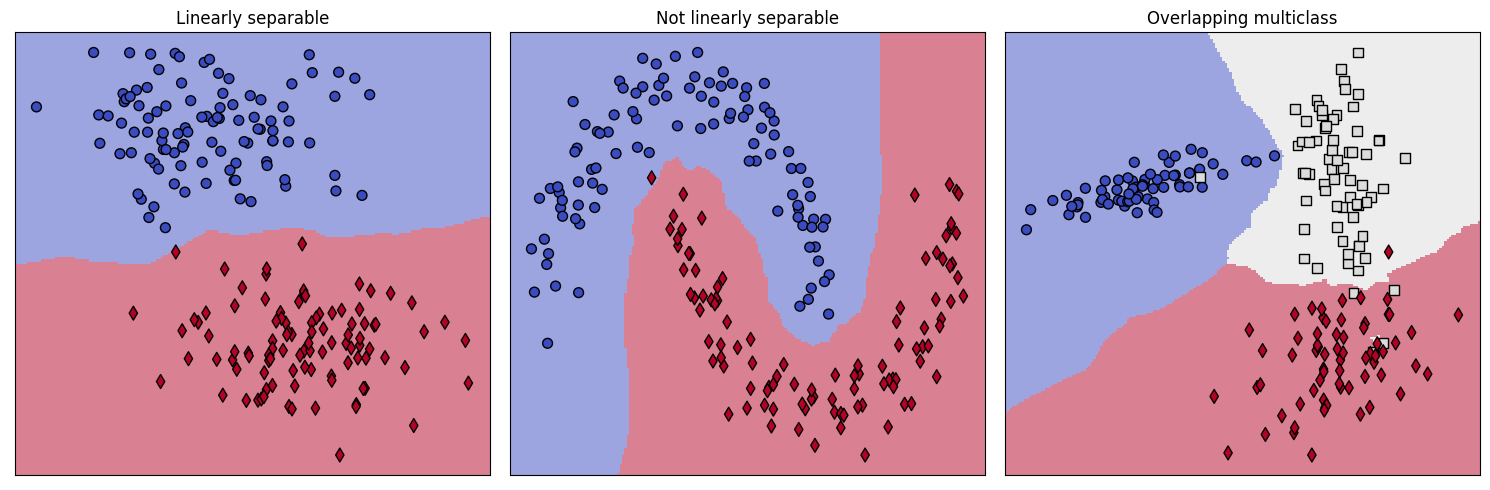

In [5]:
plot_classification(KNeighborsClassifier(n_neighbors=3))

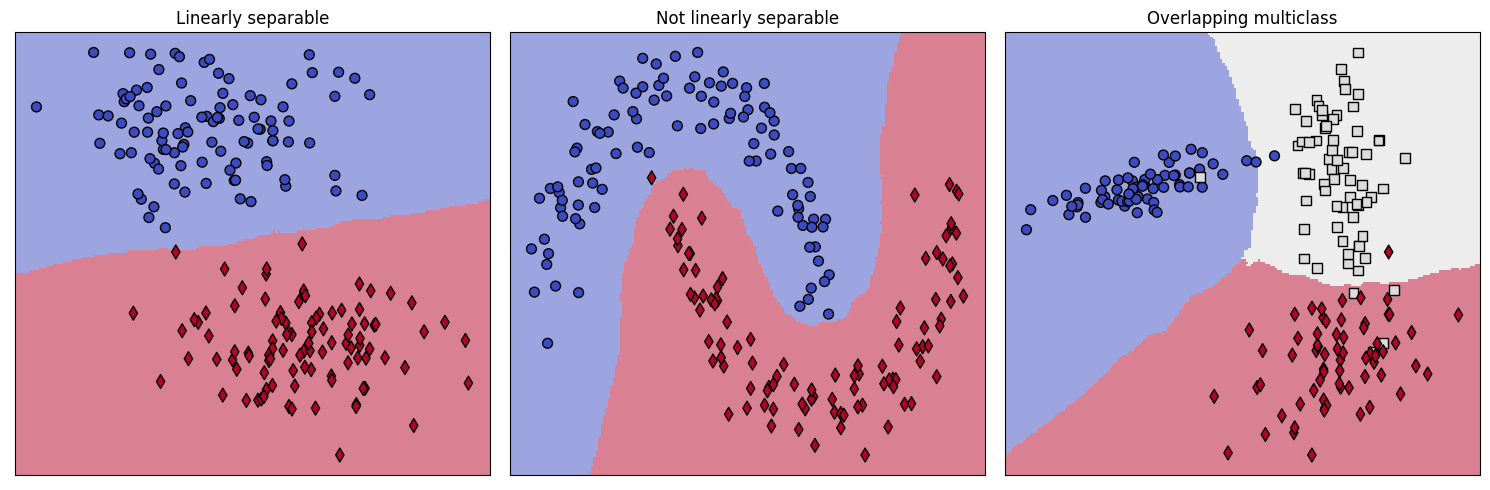

In [6]:
plot_classification(KNeighborsClassifier(n_neighbors=17))

## More toy data

In [7]:
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_classes=10, n_clusters_per_class=2, random_state=0)
X.shape, y.shape

((1000, 5), (1000,))

Running the score() method compares classifiers performancce on data set X with target labels y. Since there was no train/test split here, the output is the accuracy on the training set.

In [8]:
classifier = KNeighborsClassifier(n_neighbors=3).fit(X, y)

print("Training set accuracy %.1f%%" % (classifier.score(X, y)*100))

Training set accuracy 78.7%


Let's try this with a better methodology. What is happening here? Why **might** this a better way of testing the classifier than the above?

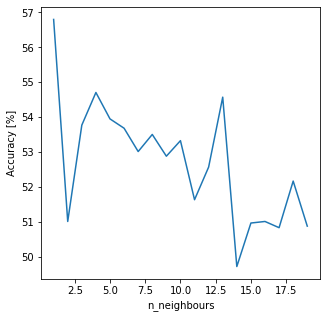

In [9]:
from sklearn.model_selection import train_test_split

scores_to_plot = list()
neighbours = list(range(1, 20))
for n in neighbours:
  classifier = KNeighborsClassifier(n_neighbors=n)
  scores = list()
  for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
  scores_to_plot.append(np.mean(scores)*100)

plt.figure(figsize=(5, 5))
plt.plot(neighbours, scores_to_plot)
plt.ylabel("Accuracy [%]")
plt.xlabel("n_neighbours")
plt.show()